In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sns.set_theme()

In [3]:
nikhil = pd.read_excel("E:/Python Programs/Weekly milk Route_test.xlsx", header=1)
nikhil.drop(labels=["Unnamed: 0"],axis=1, inplace=True)
nikhil.shape
nikhil

Customer Code    Customer Name Category Description     Day Id  \
0           0050D       BREDA RYAN             DOORSTEP 2024-03-29   
1           0334D  PATRICK MEAGHER                 SHOP 2024-03-29   
2             NaN              NaN                  NaN 2024-03-29   
3             NaN              NaN                  NaN 2024-03-29   
4             NaN              NaN                  NaN 2024-03-29   
..            ...              ...                  ...        ...   
468           NaN              NaN                  NaN 2024-04-04   
469           NaN              NaN                  NaN 2024-04-04   
470         4104D    DUNNES STORES             MULTIPLE 2024-04-04   
471           NaN              NaN                  NaN 2024-04-04   
472           NaN              NaN                  NaN 2024-04-04   

    Week Day Full  Product Code      Product Description  Quantity  Qty (GAU)  
0          Friday           121         LOW FAT 1LTR CTN         2        2.0  
1          Friday           101            MILK 1LTR CTN         9        9.0  
2          Friday           103            MILK 2LTR BTL        12       24.0  
3          Friday           104         LOW FAT 2LTR BTL         1        2.0  
4          Friday           110           MILK 500ML BTL         2        1.0  
..            ...           ...                      ...       ...        ...  
468      Thursday           121         LOW FAT 1LTR CTN         0        0.0  
469      Thursday           202  CREAM 250ML CUP THURLES         4        1.0  
470      Thursday           103            MILK 2LTR BTL        30       60.0  
471      Thursday           104         LOW FAT 2LTR BTL         3        6.0  
472      Thursday           112            MILK 1LTR BTL         5        5.0  

[473 rows x 9 columns]

In [4]:
nikhil.fillna(method="ffill", inplace=True)

C:\Users\skong\AppData\Local\Temp\ipykernel_5128\2500852901.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nikhil.fillna(method="ffill", inplace=True)


In [5]:
nikhil.rename(mapper={"Customer Code":"cust_code","Customer Name":"cust_name","Category Description":"cat_desc","Day Id":"date", 
                     "Week Day Full":"day","Product Code":"prod_code","Product Description":"prod_desc","Quantity":"quantity",
                     "Qty (GAU)":"GAU"},axis=1,inplace=True)
nikhil.head()

cust_code        cust_name  cat_desc       date     day  prod_code  \
0     0050D       BREDA RYAN  DOORSTEP 2024-03-29  Friday        121   
1     0334D  PATRICK MEAGHER      SHOP 2024-03-29  Friday        101   
2     0334D  PATRICK MEAGHER      SHOP 2024-03-29  Friday        103   
3     0334D  PATRICK MEAGHER      SHOP 2024-03-29  Friday        104   
4     0334D  PATRICK MEAGHER      SHOP 2024-03-29  Friday        110   

          prod_desc  quantity   GAU  
0  LOW FAT 1LTR CTN         2   2.0  
1     MILK 1LTR CTN         9   9.0  
2     MILK 2LTR BTL        12  24.0  
3  LOW FAT 2LTR BTL         1   2.0  
4    MILK 500ML BTL         2   1.0

In [6]:
nikhil.prod_desc.unique()
for x in list(nikhil.prod_desc.unique()):
    print(x)

LOW FAT 1LTR CTN
MILK 1LTR CTN
MILK 2LTR BTL
LOW FAT 2LTR BTL
MILK 500ML BTL
CREAM 250ML CUP THURLES
BUTTERMILK 1LTR CTN THURLES
SKIM MILK 500ML BTL
MILK 1LTR BTL
CREAM 3LTR BOTTLE
MEADOW 2LTR MILK BTL
MILK 3LTR BTL
MILK 12LTR PACK
BUTTER PORTIONS 600 PACK
MEADOW 2LTR LOW FAT BTL
TIPP FRESH 1LTR WHOLE MILK BTL GMO FREE
TIPP FRESH 1LTR LOW FAT BTL GMO FREE
CREAM 200ML CUP THURLES
SLIMMILK 1LTR BTL
TIPP BUTTER 1LB
TIPP 2LTR FRESH BTL WHOLE MILK


In [7]:
nikhil[nikhil.prod_desc=="LOW FAT 1LTR CTN"].max().loc["quantity"]

20

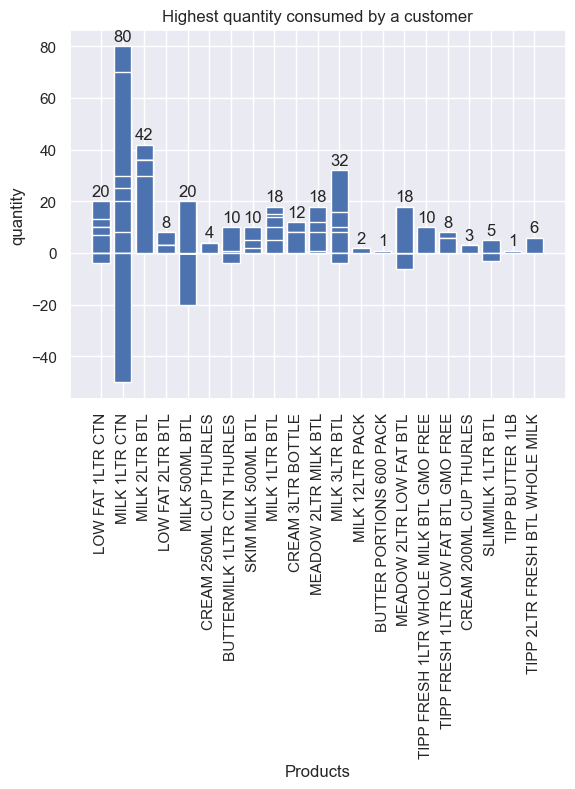

In [8]:
# Highest quantity consumed by a customer

plt.bar(x="prod_desc", height="quantity", data=nikhil)
plt.xlabel("Products")
plt.ylabel("quantity")
plt.xticks(rotation=90)
for i in list(nikhil.prod_desc.unique()):
    plt.text(x=i, y=(nikhil[nikhil.prod_desc==i].max().loc["quantity"])+2,s=nikhil[nikhil.prod_desc==i].max().loc["quantity"],ha="center")
plt.title("Highest quantity consumed by a customer")
plt.show()

In [9]:
np.random.seed(10)

dell = pd.DataFrame({"month":np.arange(1,7), "sales": np.random.randint(50,200,6)})
hp = pd.DataFrame({"month":np.arange(1,7), "sales": np.random.randint(50,200,6)})
lenovo = pd.DataFrame({"month":np.arange(1,7), "sales": np.random.randint(50,200,6)})
others = pd.DataFrame({"month":np.arange(1,7), "sales": np.random.randint(50,200,6)})

In [10]:
dell

month  sales
0      1     59
1      2    175
2      3     65
3      4    114
4      5    163
5      6    173

In [11]:
hp

month  sales
0      1    163
1      2     58
2      3    123
3      4     50
4      5     90
5      6    165

In [12]:
lenovo

month  sales
0      1     66
1      2    150
2      3    189
3      4    104
4      5    138
5      6    157

In [13]:
others

month  sales
0      1    172
1      2    112
2      3     83
3      4    150
4      5    104
5      6    127

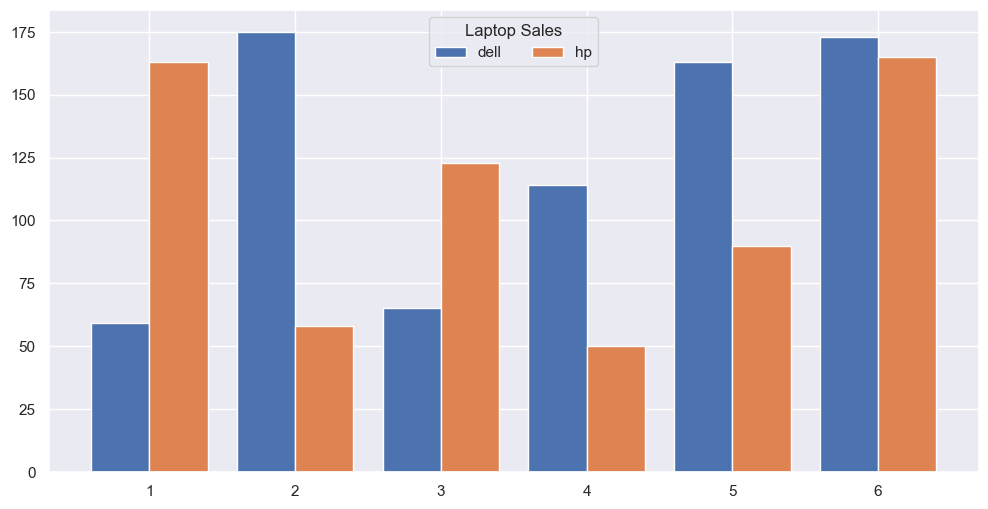

In [14]:
# Clustered Bar charts for 2 datasets

plt.figure(figsize=[12,6])
plt.bar(x="month", height="sales", data=dell,width=-0.4,align='edge', label="dell")
plt.bar(x="month", height="sales", data=hp,width=0.4,align='edge', label="hp")
plt.legend(ncol=2, title="Laptop Sales")
plt.show()

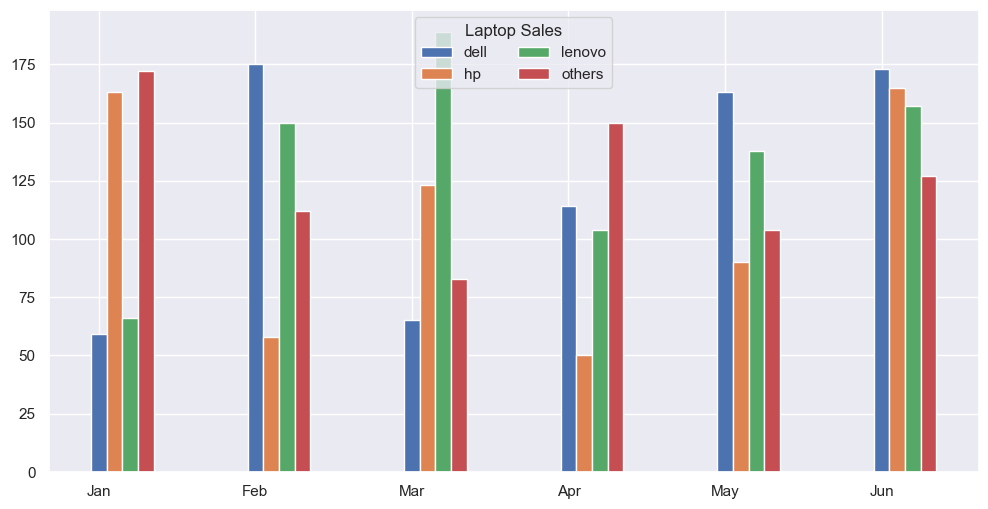

In [15]:
# Clustered Bar charts for multiple datasets

plt.figure(figsize=[12,6])
plt.bar(x="month", height="sales", data=dell,width=0.1, label="dell")
plt.bar(x=np.arange(1.1,7), height="sales", data=hp,width=0.1, label="hp")
plt.bar(x=np.arange(1.2,7), height="sales", data=lenovo,width=0.1, label="lenovo")
plt.bar(x=np.arange(1.3,7), height="sales", data=others,width=0.1, label="others")
plt.legend(ncol=2, title="Laptop Sales")
plt.xticks(ticks=[1,2,3,4,5,6],labels=["Jan","Feb","Mar","Apr","May","Jun"])
plt.show()

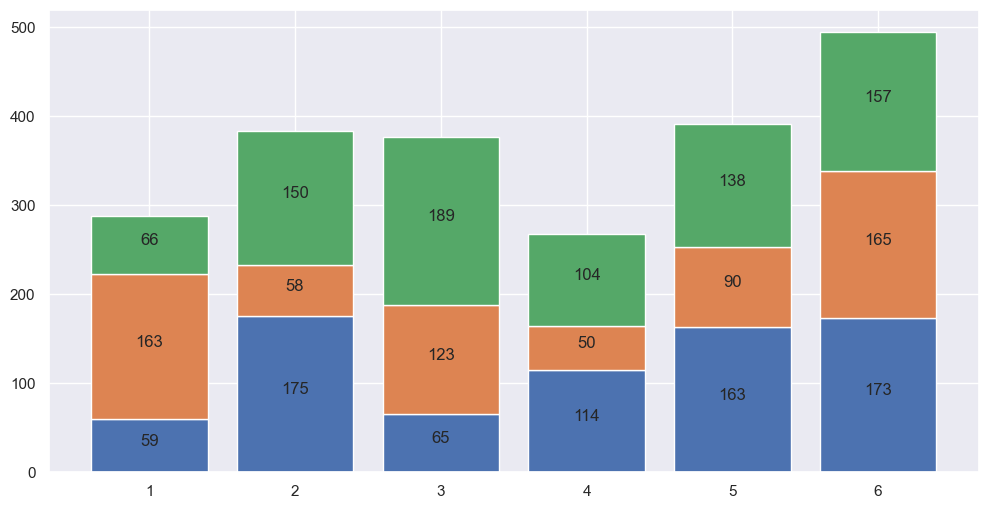

In [16]:
# Stacked Bar charts for multiple datasets

plt.figure(figsize=[12,6])
plt.bar(x="month", height="sales", data=dell, label="dell")
for i in range(0,6):
    plt.text(x=i+1,y=dell.sales[i]/2,s=dell.sales[i], ha="center")
plt.bar(x='month', height="sales", data=hp, label="hp",bottom=dell.sales)
for i in range(0,6):
    plt.text(x=i+1,y=dell.sales[i]+hp.sales[i]/2,s=hp.sales[i], ha="center")
plt.bar(x='month', height="sales", data=lenovo, label="lenovo",bottom=dell.sales+hp.sales)
for i in range(0,6):
    plt.text(x=i+1,y=dell.sales[i]+hp.sales[i]+lenovo.sales[i]/2,s=lenovo.sales[i], ha="center")
plt.show()

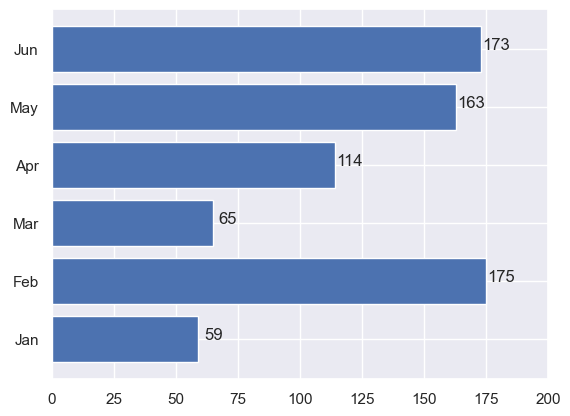

In [17]:
# Horizontal bar charts

plt.barh(y="month", width="sales", data=dell)
for i in range(0,6):
    plt.text(y=i+1,x=dell.sales[i]+6,s=dell.sales[i], ha="center")
plt.xlim(0,200)
plt.yticks(ticks=[1,2,3,4,5,6],labels=["Jan","Feb","Mar","Apr","May","Jun"])
plt.show()

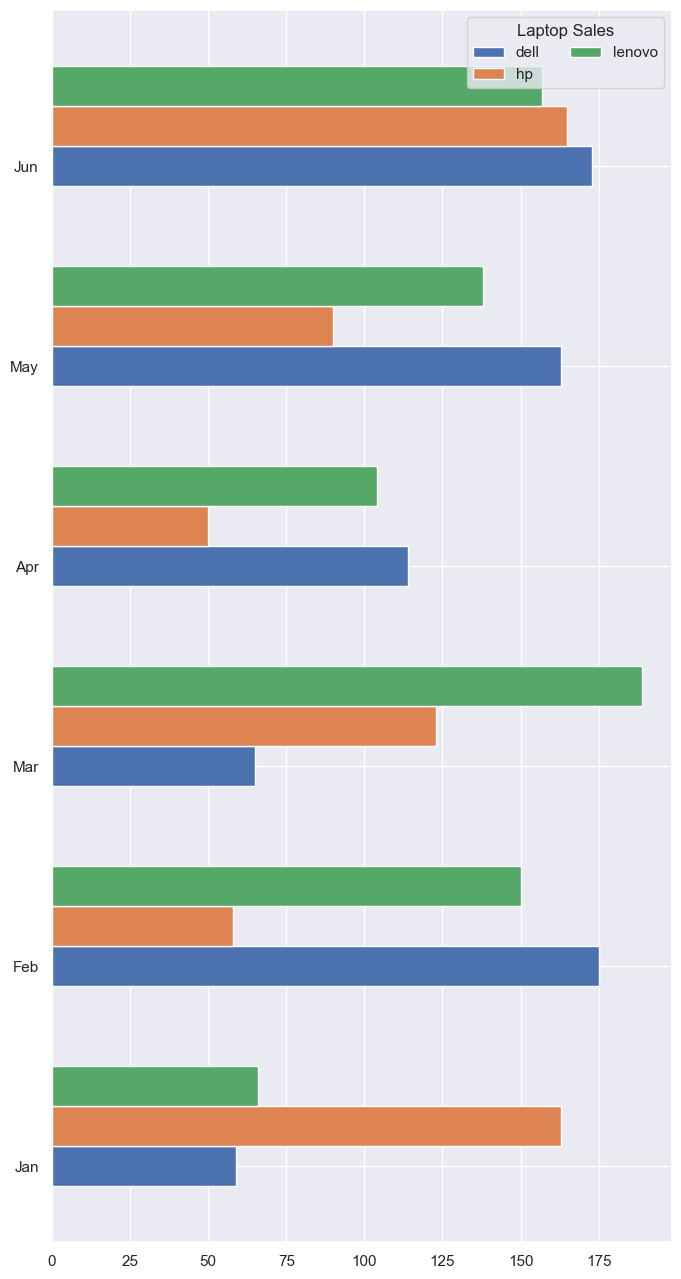

In [18]:
# Clustered Horizontal bar charts for multiple datasets

plt.figure(figsize=[8,16])
plt.barh(y="month", width="sales", data=dell,height=0.2, label="dell")
plt.barh(y=np.arange(1.2,7), width="sales", data=hp,height=0.2, label="hp")
plt.barh(y=np.arange(1.4,7), width="sales", data=lenovo,height=0.2, label="lenovo")
# plt.barh(y=np.arange(1.6,7), width="sales", data=others,height=0.2, label="others")
plt.legend(ncol=2, title="Laptop Sales", loc="upper right")
plt.yticks(ticks=[1,2,3,4,5,6],labels=["Jan","Feb","Mar","Apr","May","Jun"])
plt.show()

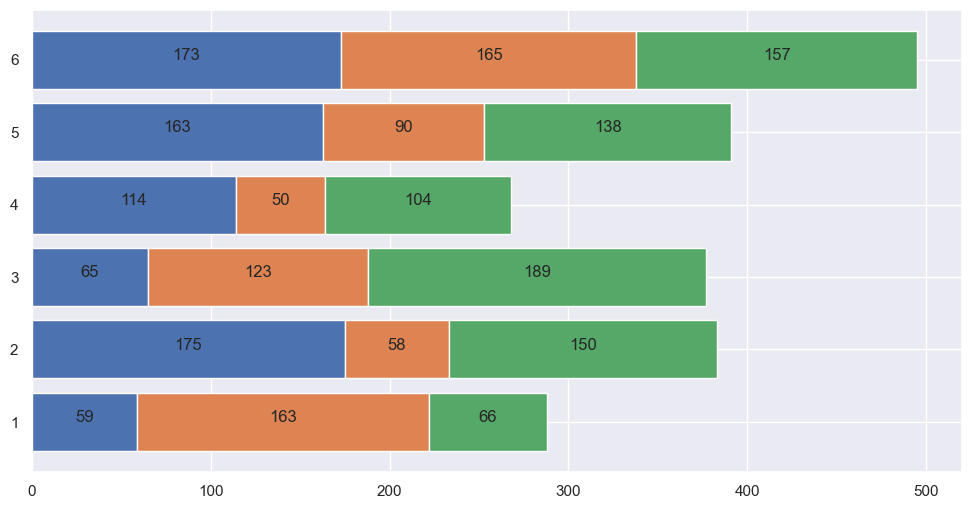

In [19]:
# Stacked Horizontal Bar charts for multiple datasets

plt.figure(figsize=[12,6])
plt.barh(y="month", width="sales", data=dell, label="dell")
for i in range(0,6):
    plt.text(y=i+1,x=dell.sales[i]/2,s=dell.sales[i], ha="center")
plt.barh(y='month', width="sales", data=hp, label="hp",left=dell.sales)
for i in range(0,6):
    plt.text(y=i+1,x=dell.sales[i]+hp.sales[i]/2,s=hp.sales[i], ha="center")
plt.barh(y='month', width="sales", data=lenovo, label="lenovo",left=dell.sales+hp.sales)
for i in range(0,6):
    plt.text(y=i+1,x=dell.sales[i]+hp.sales[i]+lenovo.sales[i]/2,s=lenovo.sales[i], ha="center")
plt.show()

In [20]:
nikhil.head()

cust_code        cust_name  cat_desc       date     day  prod_code  \
0     0050D       BREDA RYAN  DOORSTEP 2024-03-29  Friday        121   
1     0334D  PATRICK MEAGHER      SHOP 2024-03-29  Friday        101   
2     0334D  PATRICK MEAGHER      SHOP 2024-03-29  Friday        103   
3     0334D  PATRICK MEAGHER      SHOP 2024-03-29  Friday        104   
4     0334D  PATRICK MEAGHER      SHOP 2024-03-29  Friday        110   

          prod_desc  quantity   GAU  
0  LOW FAT 1LTR CTN         2   2.0  
1     MILK 1LTR CTN         9   9.0  
2     MILK 2LTR BTL        12  24.0  
3  LOW FAT 2LTR BTL         1   2.0  
4    MILK 500ML BTL         2   1.0

In [21]:
df=nikhil.groupby(["cat_desc","prod_desc"]).size().to_frame().reset_index("prod_desc").rename(columns={0:"count"})
type(df)
df.head(8)

prod_desc  count
cat_desc                                    
BUSINESS     BUTTER PORTIONS 600 PACK      1
BUSINESS  BUTTERMILK 1LTR CTN THURLES      1
BUSINESS            CREAM 3LTR BOTTLE      2
BUSINESS              MILK 12LTR PACK      2
BUSINESS                MILK 1LTR BTL      1
BUSINESS                MILK 2LTR BTL      3
BUSINESS                MILK 3LTR BTL      2
CATERING  BUTTERMILK 1LTR CTN THURLES      2

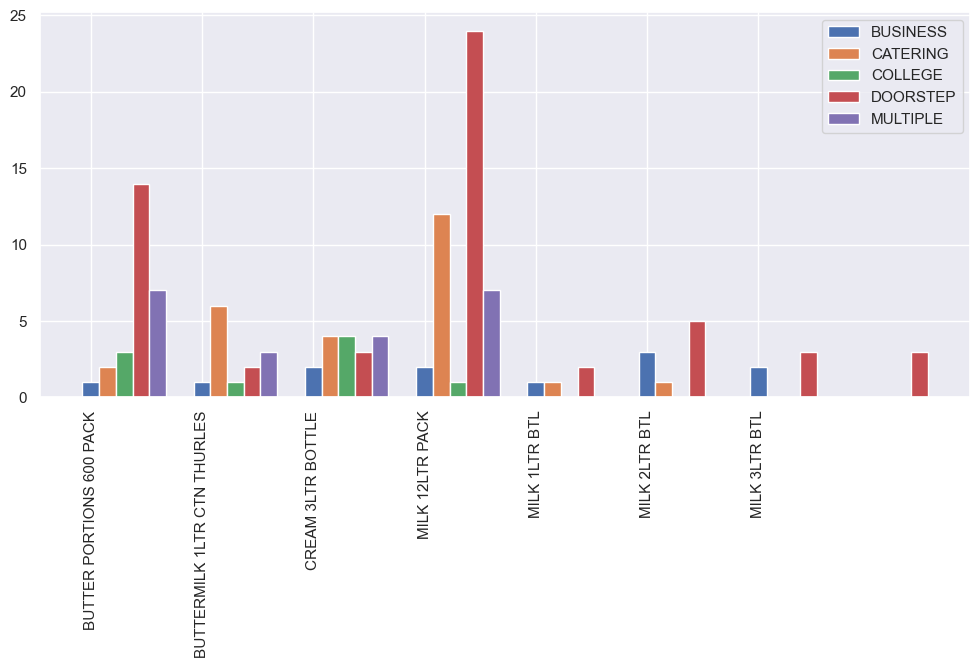

In [22]:
plt.figure(figsize=[12,5])
plt.bar(x=[1,2,3,4,5,6,7],height="count",data=df.loc["BUSINESS"],width=0.15,label="BUSINESS")
plt.bar(x=[1.15,2.15,3.15,4.15,5.15,6.15],height="count",data=df.loc["CATERING"],width=0.15,label="CATERING")
plt.bar(x=[1.30,2.30,3.30,4.30],height="count",data=df.loc["COLLEGE"],width=0.15,label="COLLEGE")
plt.bar(x=[1.45,2.45,3.45,4.45,5.45,6.45,7.45,8.45],height="count",data=df.loc["DOORSTEP"],width=0.15,label="DOORSTEP")
plt.bar(x=[1.6,2.6,3.6,4.6],height="count",data=df.loc["MULTIPLE"],width=0.15,label="MULTIPLE")
#plt.bar(x=[1.75,2.75,3.75,4.75,5.75,6.75,7.75,8.75,9.75,10.75,11.75,12.75,13.75,14.75,15.75,16.75,17.75,18.75],height="count",data=df.loc["SHOP"],width=0.15,label="SHOP")
plt.xticks(ticks=[1,2,3,4,5,6,7],labels=["BUTTER PORTIONS 600 PACK","BUTTERMILK 1LTR CTN THURLES","CREAM 3LTR BOTTLE",
                                   "MILK 12LTR PACK","MILK 1LTR BTL","MILK 2LTR BTL","MILK 3LTR BTL"],rotation=90)
plt.legend()
plt.show()

In [23]:
df

prod_desc  count
cat_desc                                                
BUSINESS                 BUTTER PORTIONS 600 PACK      1
BUSINESS              BUTTERMILK 1LTR CTN THURLES      1
BUSINESS                        CREAM 3LTR BOTTLE      2
BUSINESS                          MILK 12LTR PACK      2
BUSINESS                            MILK 1LTR BTL      1
BUSINESS                            MILK 2LTR BTL      3
BUSINESS                            MILK 3LTR BTL      2
CATERING              BUTTERMILK 1LTR CTN THURLES      2
CATERING                        CREAM 3LTR BOTTLE      6
CATERING                         LOW FAT 2LTR BTL      4
CATERING                            MILK 2LTR BTL     12
CATERING                            MILK 3LTR BTL      1
CATERING                          TIPP BUTTER 1LB      1
COLLEGE                   MEADOW 2LTR LOW FAT BTL      3
COLLEGE                             MILK 2LTR BTL      1
COLLEGE                            MILK 500ML BTL      4
COLLEGE                       SKIM MILK 500ML BTL      1
DOORSTEP                         LOW FAT 1LTR CTN     14
DOORSTEP                         LOW FAT 2LTR BTL      2
DOORSTEP                            MILK 1LTR BTL      3
DOORSTEP                            MILK 1LTR CTN     24
DOORSTEP                            MILK 2LTR BTL      2
DOORSTEP                            MILK 3LTR BTL      5
DOORSTEP                           MILK 500ML BTL      3
DOORSTEP                      SKIM MILK 500ML BTL      3
MULTIPLE                         LOW FAT 2LTR BTL      7
MULTIPLE                            MILK 1LTR BTL      3
MULTIPLE                            MILK 1LTR CTN      4
MULTIPLE                            MILK 2LTR BTL      7
SHOP                  BUTTERMILK 1LTR CTN THURLES      9
SHOP                      CREAM 200ML CUP THURLES      3
SHOP                      CREAM 250ML CUP THURLES     25
SHOP                            CREAM 3LTR BOTTLE      2
SHOP                             LOW FAT 1LTR CTN     39
SHOP                             LOW FAT 2LTR BTL     40
SHOP                      MEADOW 2LTR LOW FAT BTL      7
SHOP                         MEADOW 2LTR MILK BTL     23
SHOP                                MILK 1LTR BTL     18
SHOP                                MILK 1LTR CTN     45
SHOP                                MILK 2LTR BTL     48
SHOP                                MILK 3LTR BTL     27
SHOP                               MILK 500ML BTL     36
SHOP                          SKIM MILK 500ML BTL      8
SHOP                            SLIMMILK 1LTR BTL      4
SHOP               TIPP 2LTR FRESH BTL WHOLE MILK      1
SHOP         TIPP FRESH 1LTR LOW FAT BTL GMO FREE      7
SHOP      TIPP FRESH 1LTR WHOLE MILK BTL GMO FREE      7

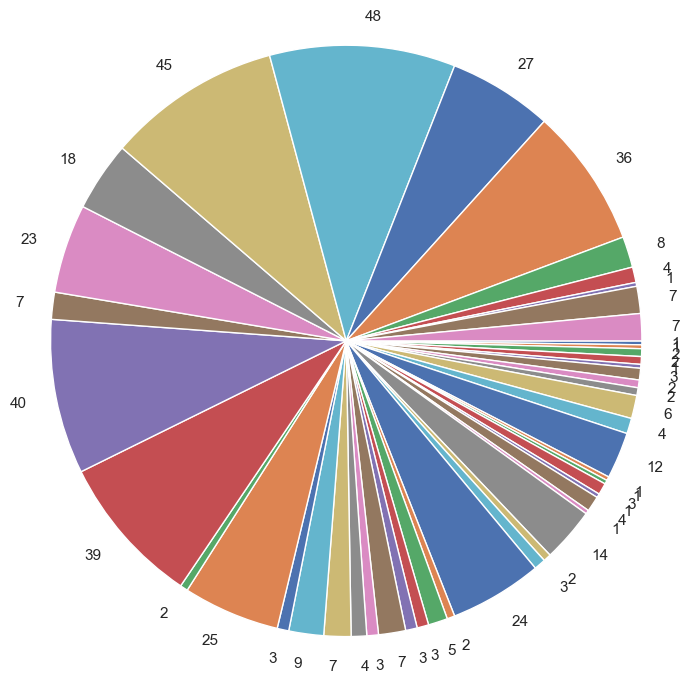

In [24]:
plt.pie(x="count", data=df, labels="count",radius=2,counterclock=False)
plt.show()

In [25]:
nikhil.head()

cust_code        cust_name  cat_desc       date     day  prod_code  \
0     0050D       BREDA RYAN  DOORSTEP 2024-03-29  Friday        121   
1     0334D  PATRICK MEAGHER      SHOP 2024-03-29  Friday        101   
2     0334D  PATRICK MEAGHER      SHOP 2024-03-29  Friday        103   
3     0334D  PATRICK MEAGHER      SHOP 2024-03-29  Friday        104   
4     0334D  PATRICK MEAGHER      SHOP 2024-03-29  Friday        110   

          prod_desc  quantity   GAU  
0  LOW FAT 1LTR CTN         2   2.0  
1     MILK 1LTR CTN         9   9.0  
2     MILK 2LTR BTL        12  24.0  
3  LOW FAT 2LTR BTL         1   2.0  
4    MILK 500ML BTL         2   1.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


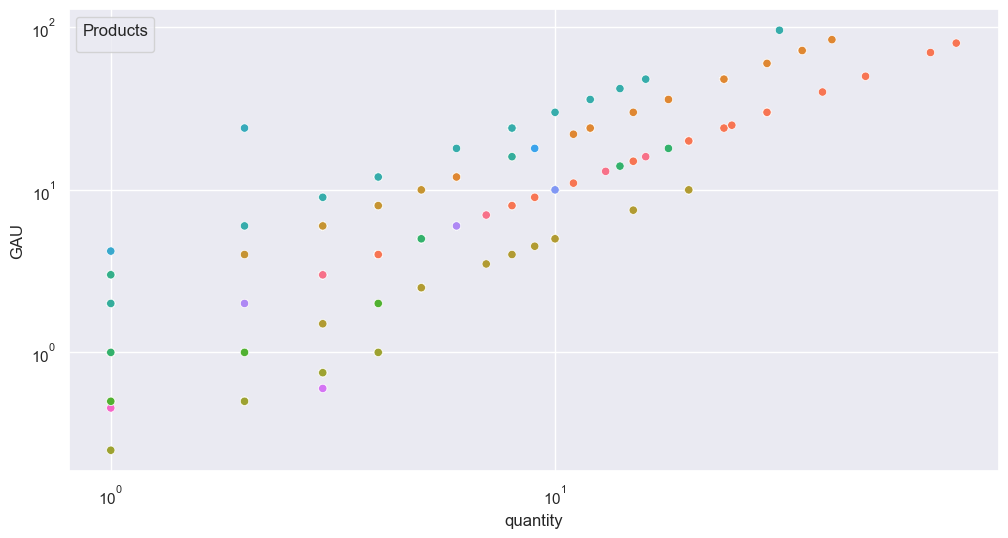

In [26]:
plt.figure(figsize=[12,6])
sns.scatterplot(x="quantity",y="GAU", data=nikhil,hue="prod_desc",legend=False)
plt.xscale(value="log")
plt.yscale(value="log")
plt.legend(title="Products", loc="best",ncols=10)
plt.show()

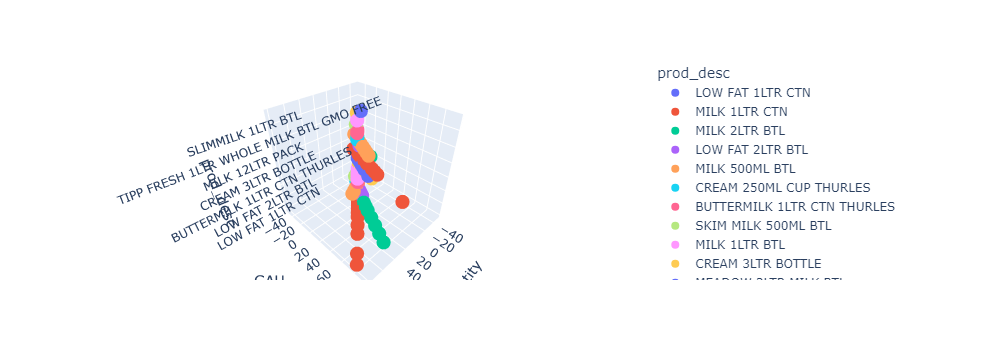

In [27]:
px.scatter_3d(data_frame=nikhil, x="quantity", y="GAU", z="prod_desc", color="prod_desc")

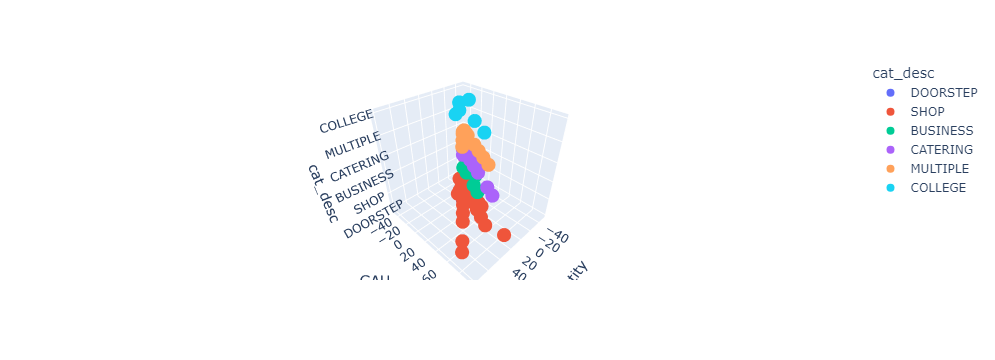

In [28]:
px.scatter_3d(data_frame=nikhil, x="quantity", y="GAU", z="cat_desc", color="cat_desc")

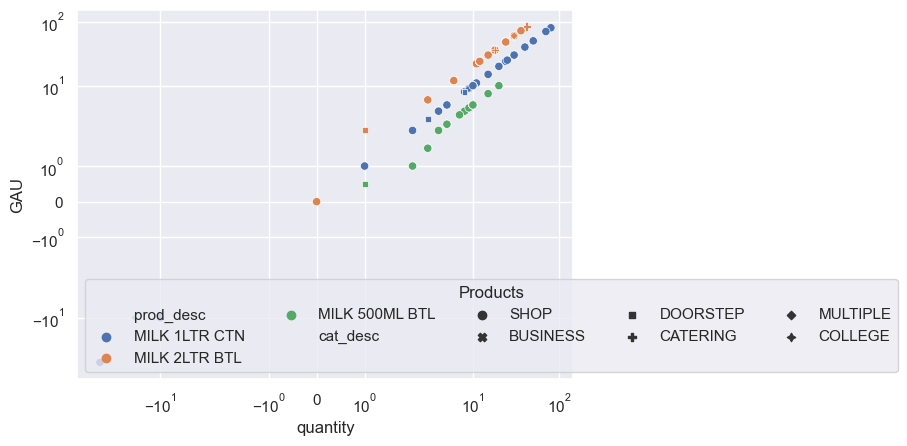

In [29]:
sns.scatterplot(x="quantity",y="GAU", data=nikhil[(nikhil.prod_desc=="MILK 500ML BTL") |  
                                                  (nikhil.prod_desc=="MILK 1LTR CTN") | 
                                                  (nikhil.prod_desc=="MILK 2LTR BTL")],
                hue="prod_desc",style="cat_desc")
plt.xscale(value="symlog")
plt.yscale(value="symlog")
plt.legend(title="Products", loc="best",ncols=5)
plt.show()

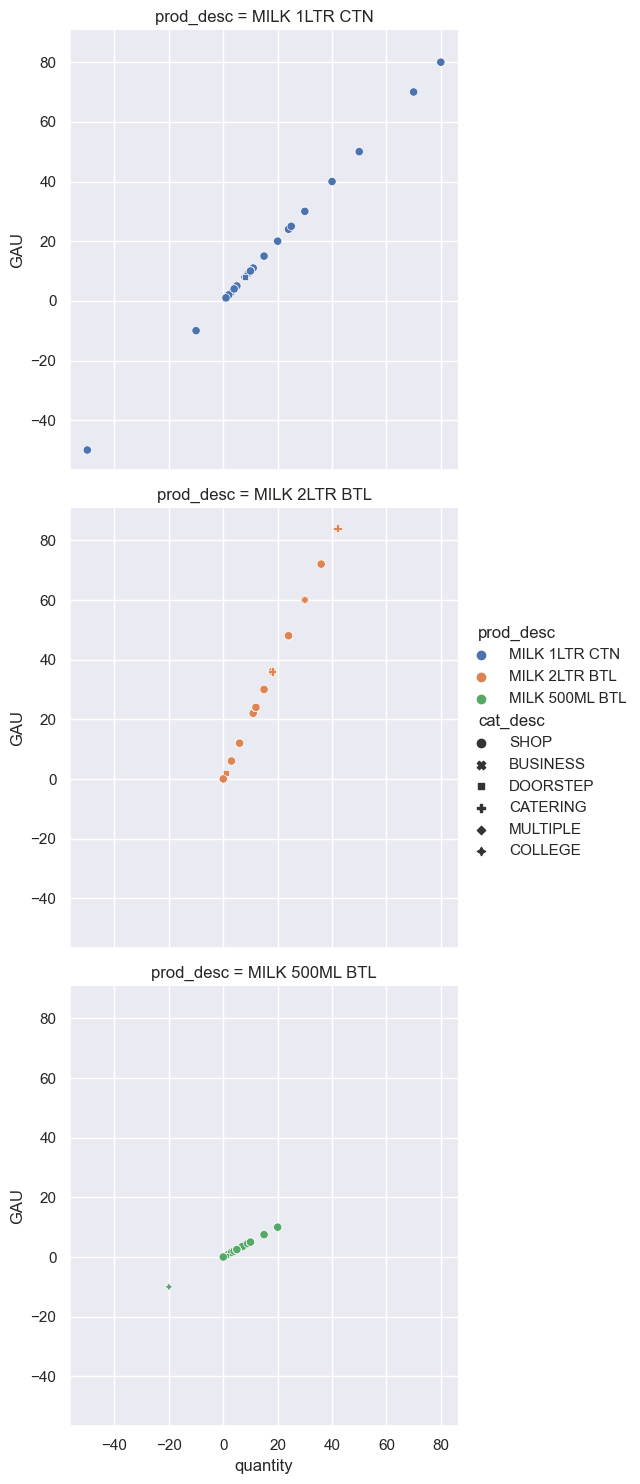

In [30]:
sns.relplot(x="quantity",y="GAU", data=nikhil[(nikhil.prod_desc=="MILK 500ML BTL") |  
                                                  (nikhil.prod_desc=="MILK 1LTR CTN") | 
                                                  (nikhil.prod_desc=="MILK 2LTR BTL")],
                hue="prod_desc",style="cat_desc", kind="scatter", row="prod_desc")
plt.show()

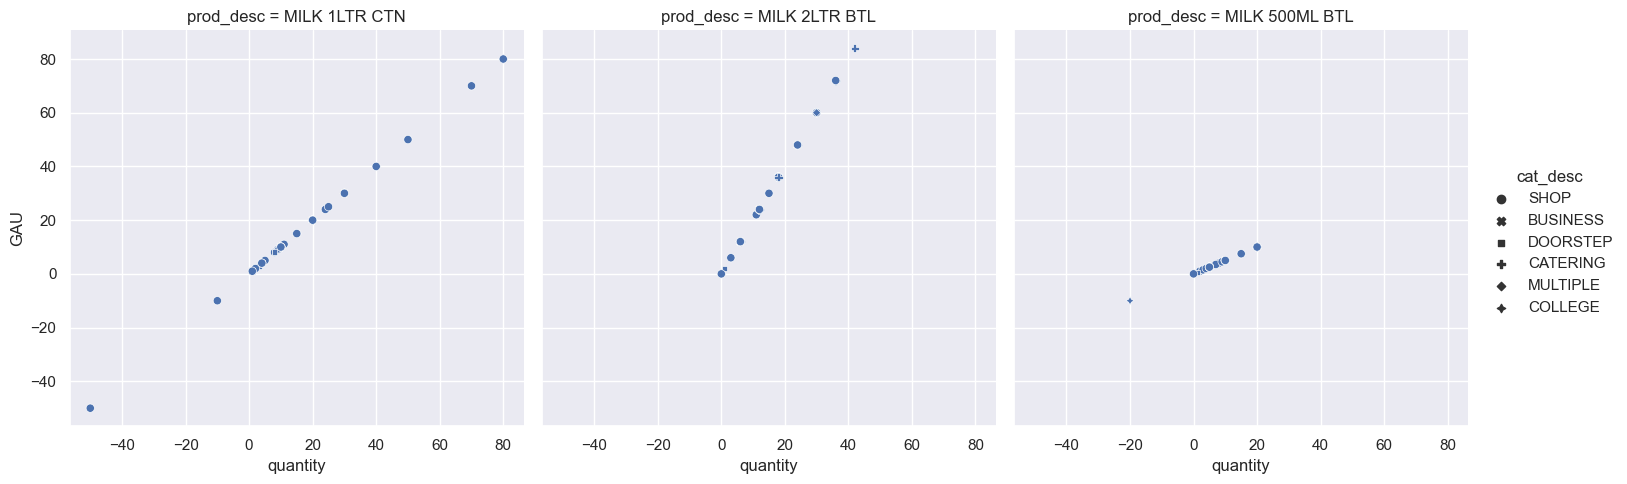

In [31]:
sns.relplot(x="quantity",y="GAU", data=nikhil[(nikhil.prod_desc=="MILK 500ML BTL") |  
                                                  (nikhil.prod_desc=="MILK 1LTR CTN") | 
                                                  (nikhil.prod_desc=="MILK 2LTR BTL")],
                style="cat_desc", kind="scatter", col="prod_desc")
plt.show()

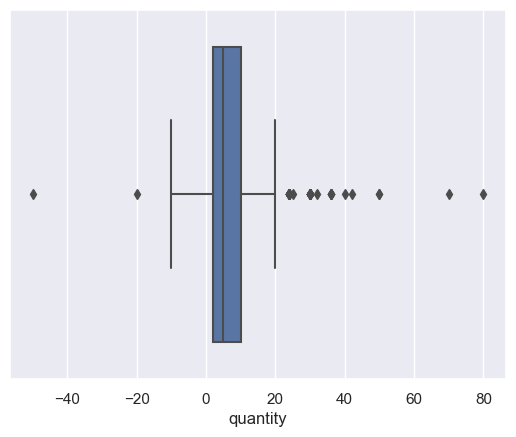

In [32]:
sns.boxplot(x="quantity", data=nikhil)
plt.show()

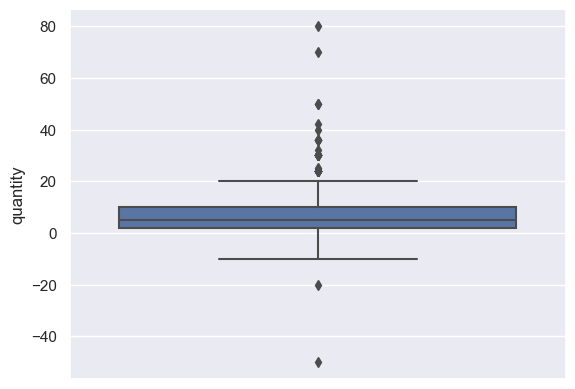

In [33]:
sns.boxplot(y="quantity", data=nikhil)
plt.show()

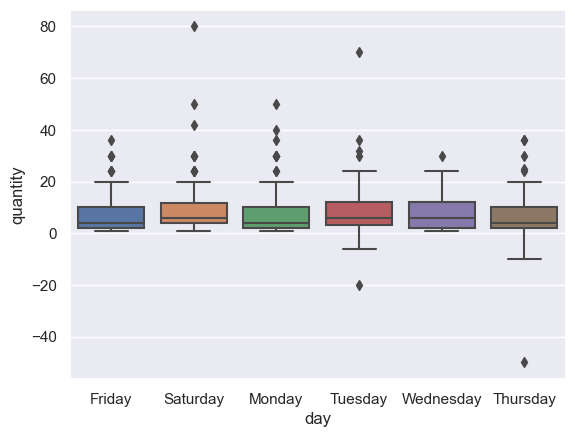

In [34]:
sns.boxplot(x="day",y="quantity", data=nikhil)
plt.show()

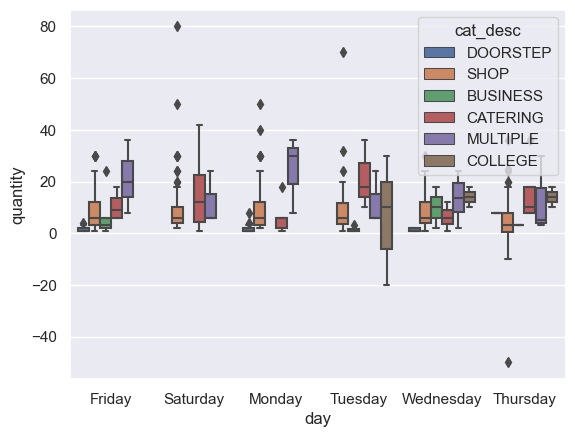

In [35]:
sns.boxplot(x="day",y="quantity", data=nikhil,hue="cat_desc")
plt.show()

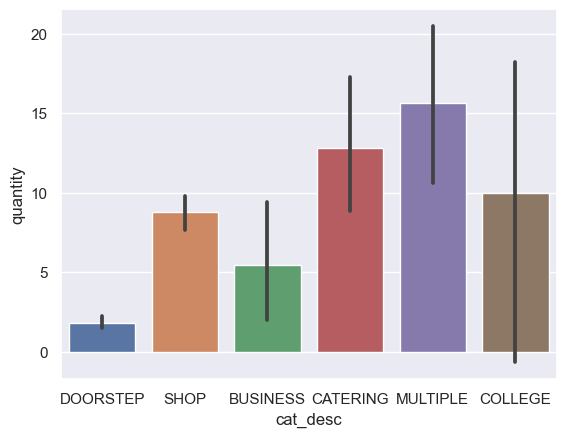

In [36]:
sns.barplot(x="cat_desc",y="quantity",data=nikhil)
plt.show()

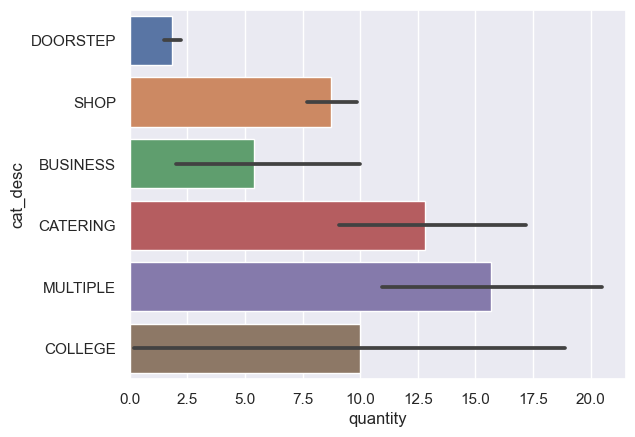

In [37]:
sns.barplot(x="quantity",y="cat_desc",data=nikhil)
plt.show()

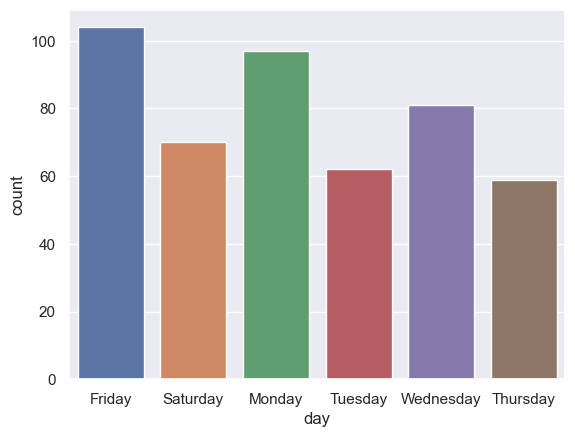

In [38]:
sns.countplot(x="day",data=nikhil)
plt.show()

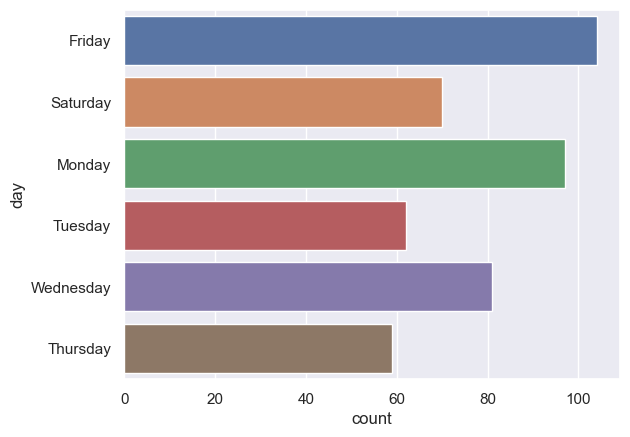

In [39]:
sns.countplot(y="day",data=nikhil)
plt.show()

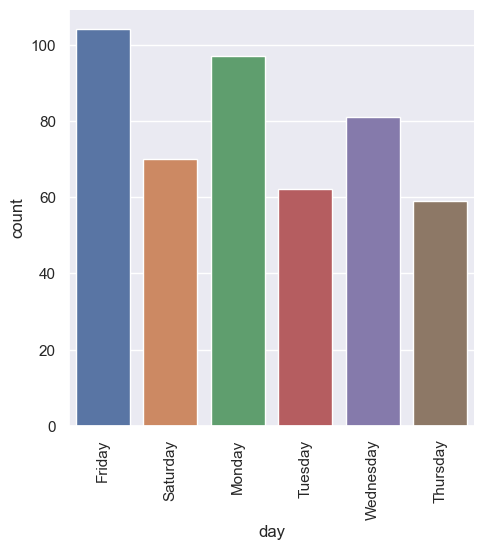

In [40]:
sns.catplot(x="day", data=nikhil,kind="count")
plt.xticks(rotation=90)
plt.show()

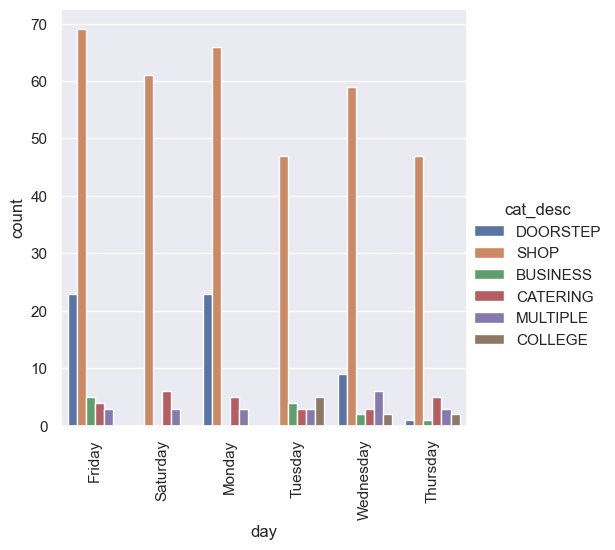

In [41]:
sns.catplot(x="day", data=nikhil,kind="count",hue="cat_desc")
plt.xticks(rotation=90)
plt.show()

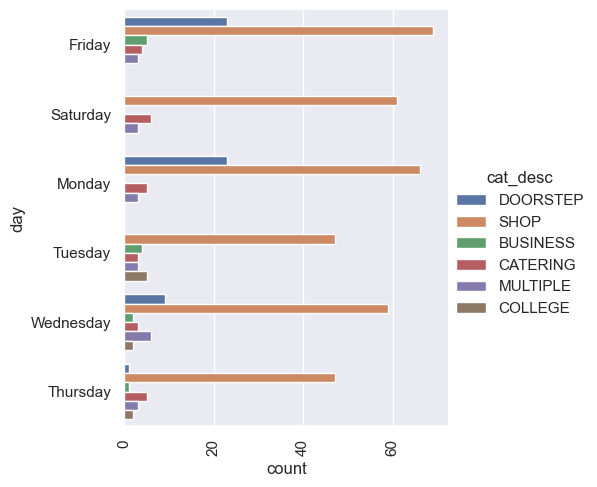

In [42]:
sns.catplot(y="day", data=nikhil,kind="count",hue="cat_desc")
plt.xticks(rotation=90)
plt.show()

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



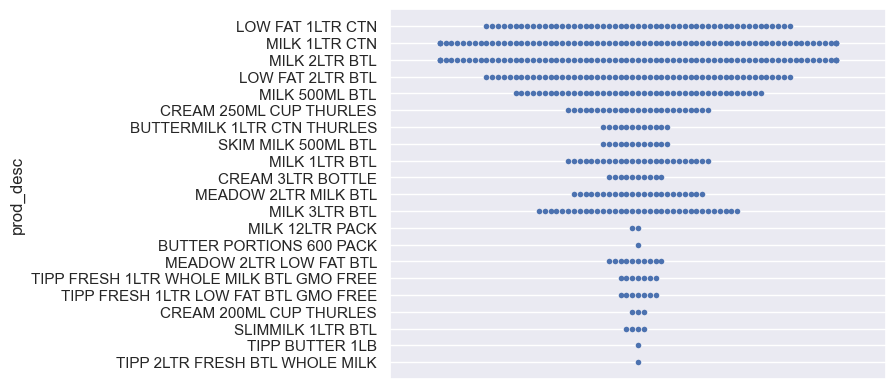

In [43]:
sns.swarmplot(y="prod_desc",data=nikhil,size=4)
plt.show()

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



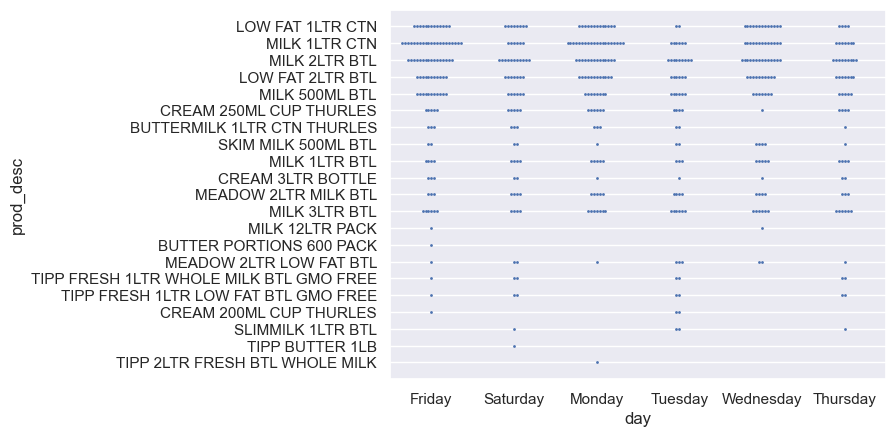

In [44]:
sns.swarmplot(x="day",y="prod_desc",data=nikhil,size=2)
plt.show()

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



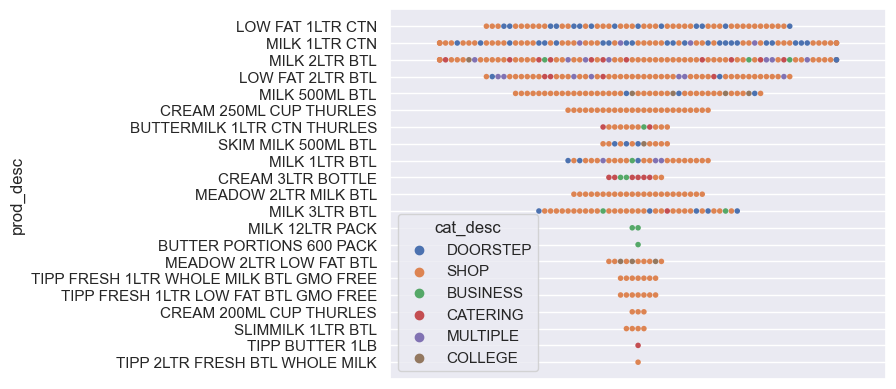

In [45]:
sns.swarmplot(y="prod_desc",data=nikhil,size=4,hue="cat_desc")
plt.show()

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



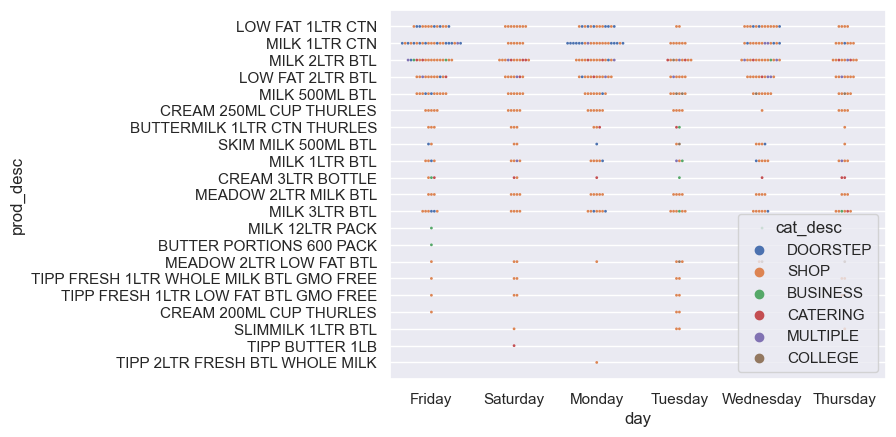

In [46]:
sns.swarmplot(x="day",y="prod_desc",data=nikhil,size=2,hue="cat_desc")
plt.show()

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



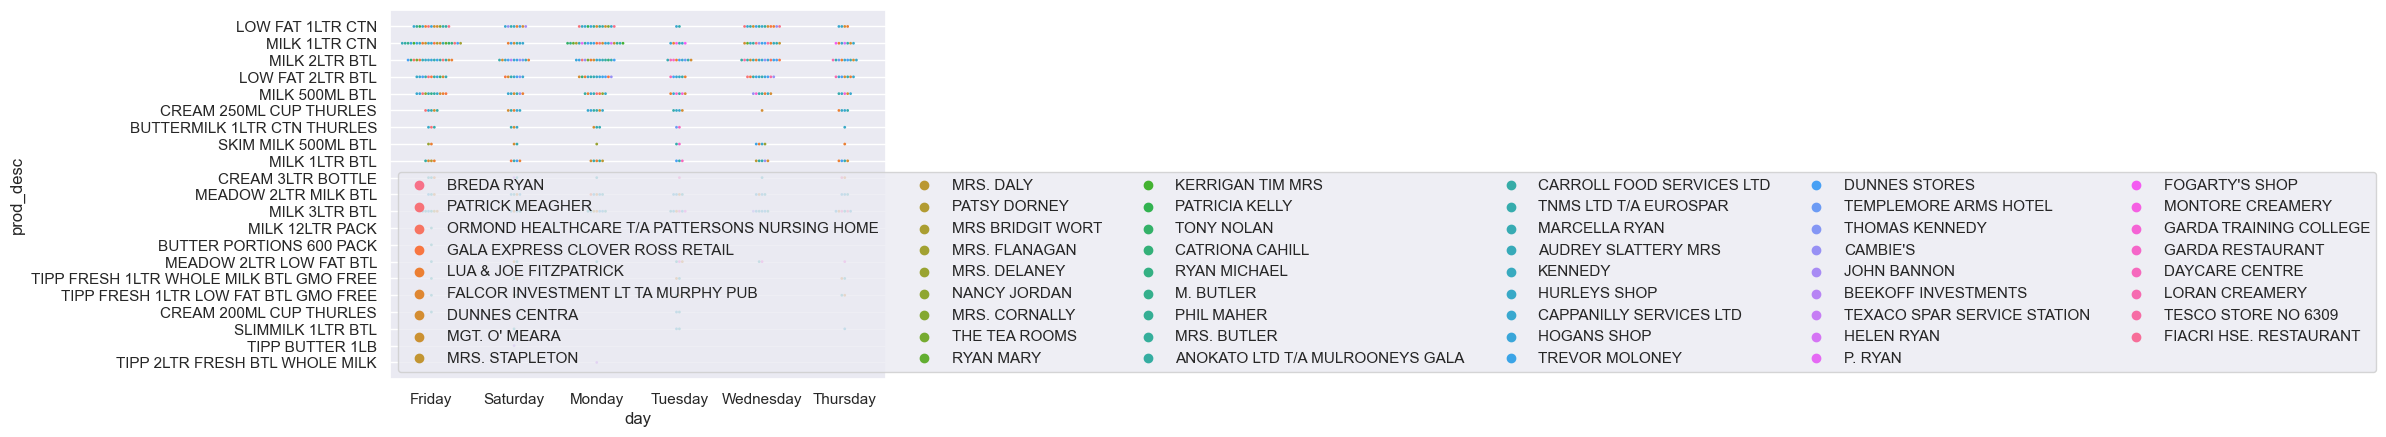

In [47]:
sns.swarmplot(x="day",y="prod_desc",data=nikhil,size=2,hue="cust_name")
plt.legend(loc="best",ncol=6)
plt.show()

In [48]:
penguins = sns.load_dataset("penguins")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [49]:
penguins.shape

(344, 7)

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



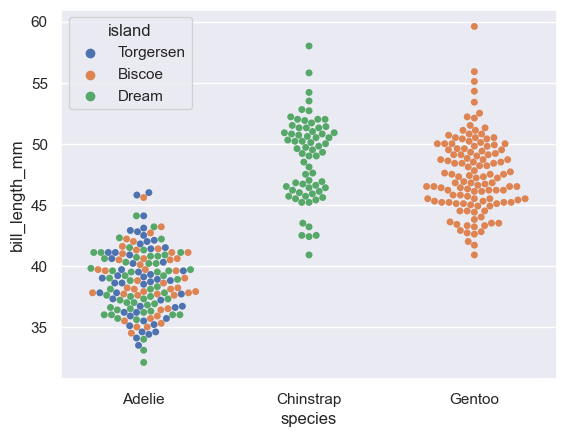

In [50]:
sns.swarmplot(x="species",y="bill_length_mm", data=penguins,hue="island")
plt.show()

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



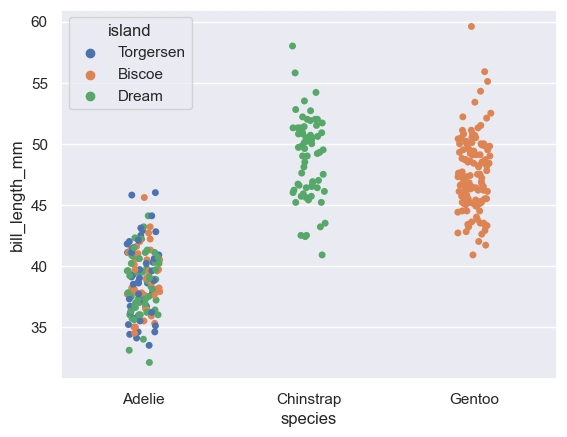

In [51]:
sns.stripplot(x="species",y="bill_length_mm", data=penguins,hue="island")
plt.show()

In [52]:
penguins_concat = pd.concat([penguins,penguins,penguins], ignore_index=True, axis=0)
penguins_concat.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [53]:
penguins_concat.shape

(1032, 7)

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



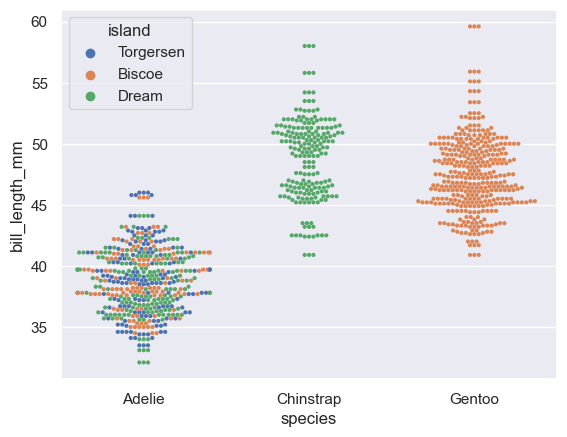

In [54]:
sns.swarmplot(x="species",y="bill_length_mm", data=penguins_concat,hue="island",size=3)
plt.show()

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



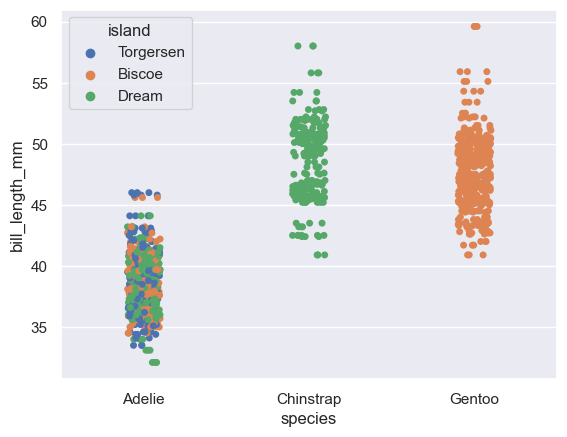

In [55]:
sns.stripplot(x="species",y="bill_length_mm", data=penguins_concat,hue="island")
plt.show()

In [56]:
tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

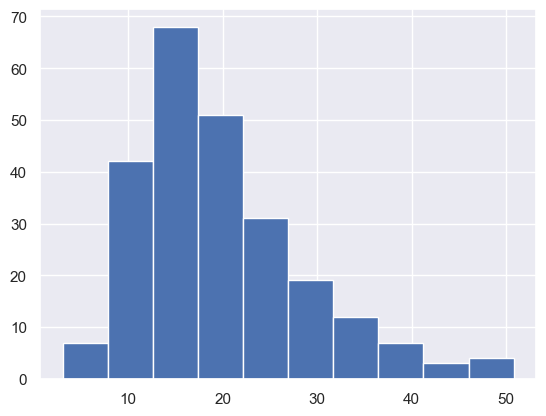

In [57]:
plt.hist(x="total_bill", data=tips)
plt.show()

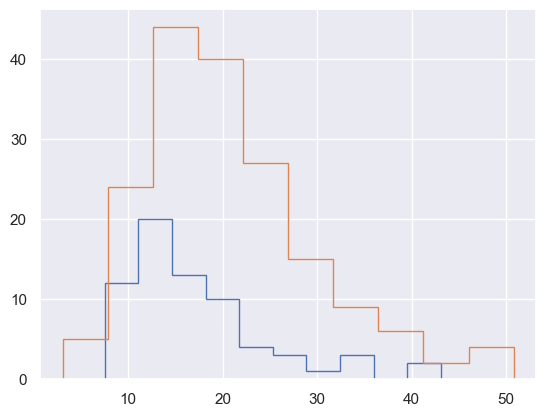

In [58]:
plt.hist(x="total_bill", data=tips[tips["time"]=="Lunch"],histtype='step')
plt.hist(x="total_bill", data=tips[tips["time"]=="Dinner"],histtype='step')
plt.show()

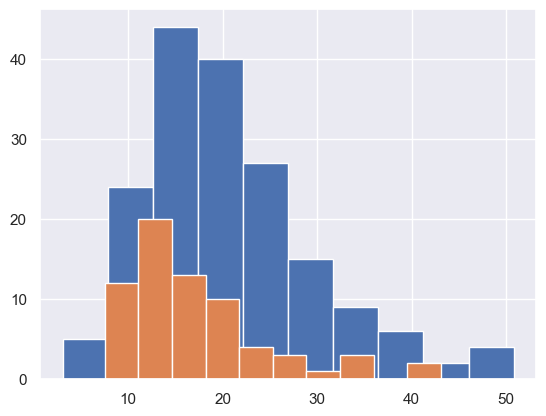

In [59]:
plt.hist(x="total_bill", data=tips[tips["time"]=="Dinner"])
plt.hist(x="total_bill", data=tips[tips["time"]=="Lunch"])
plt.show()

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



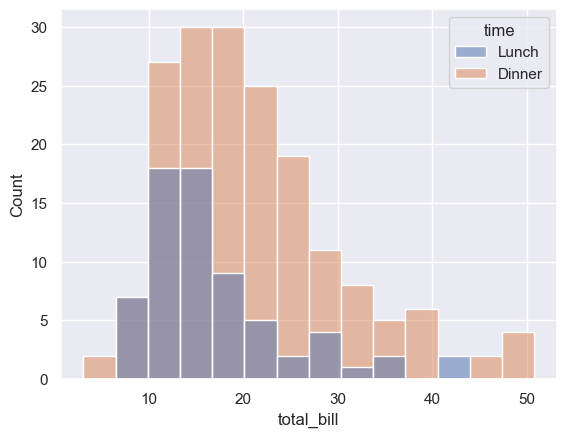

In [60]:
sns.histplot(x="total_bill", data=tips, hue="time")
plt.show()

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



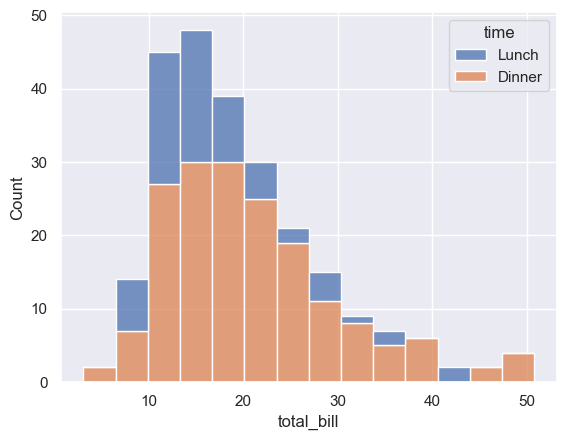

In [61]:
sns.histplot(x="total_bill", data=tips, hue="time",multiple="stack")
plt.show()

In [64]:
tips=sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

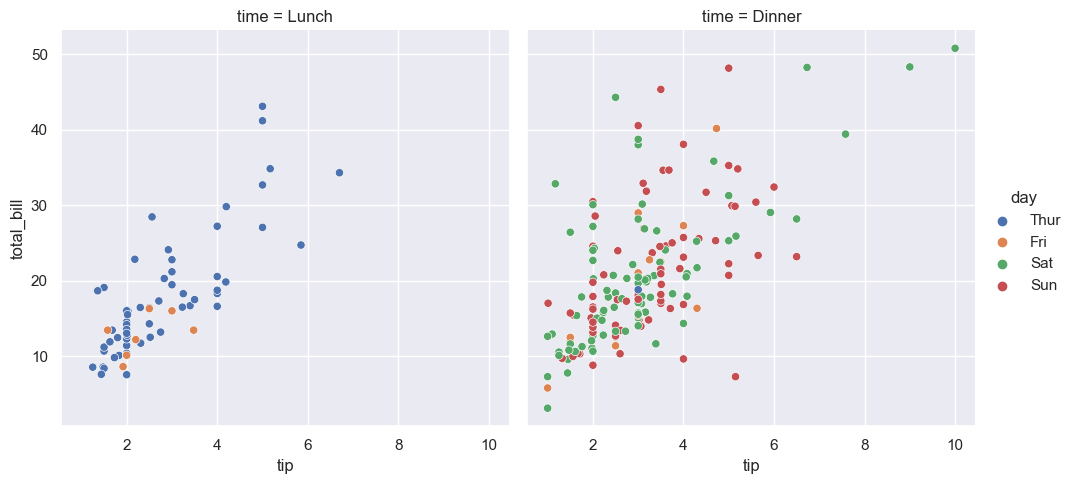

In [65]:
sns.relplot(x='tip', y='total_bill', data=tips, hue='day', col='time')
plt.show()

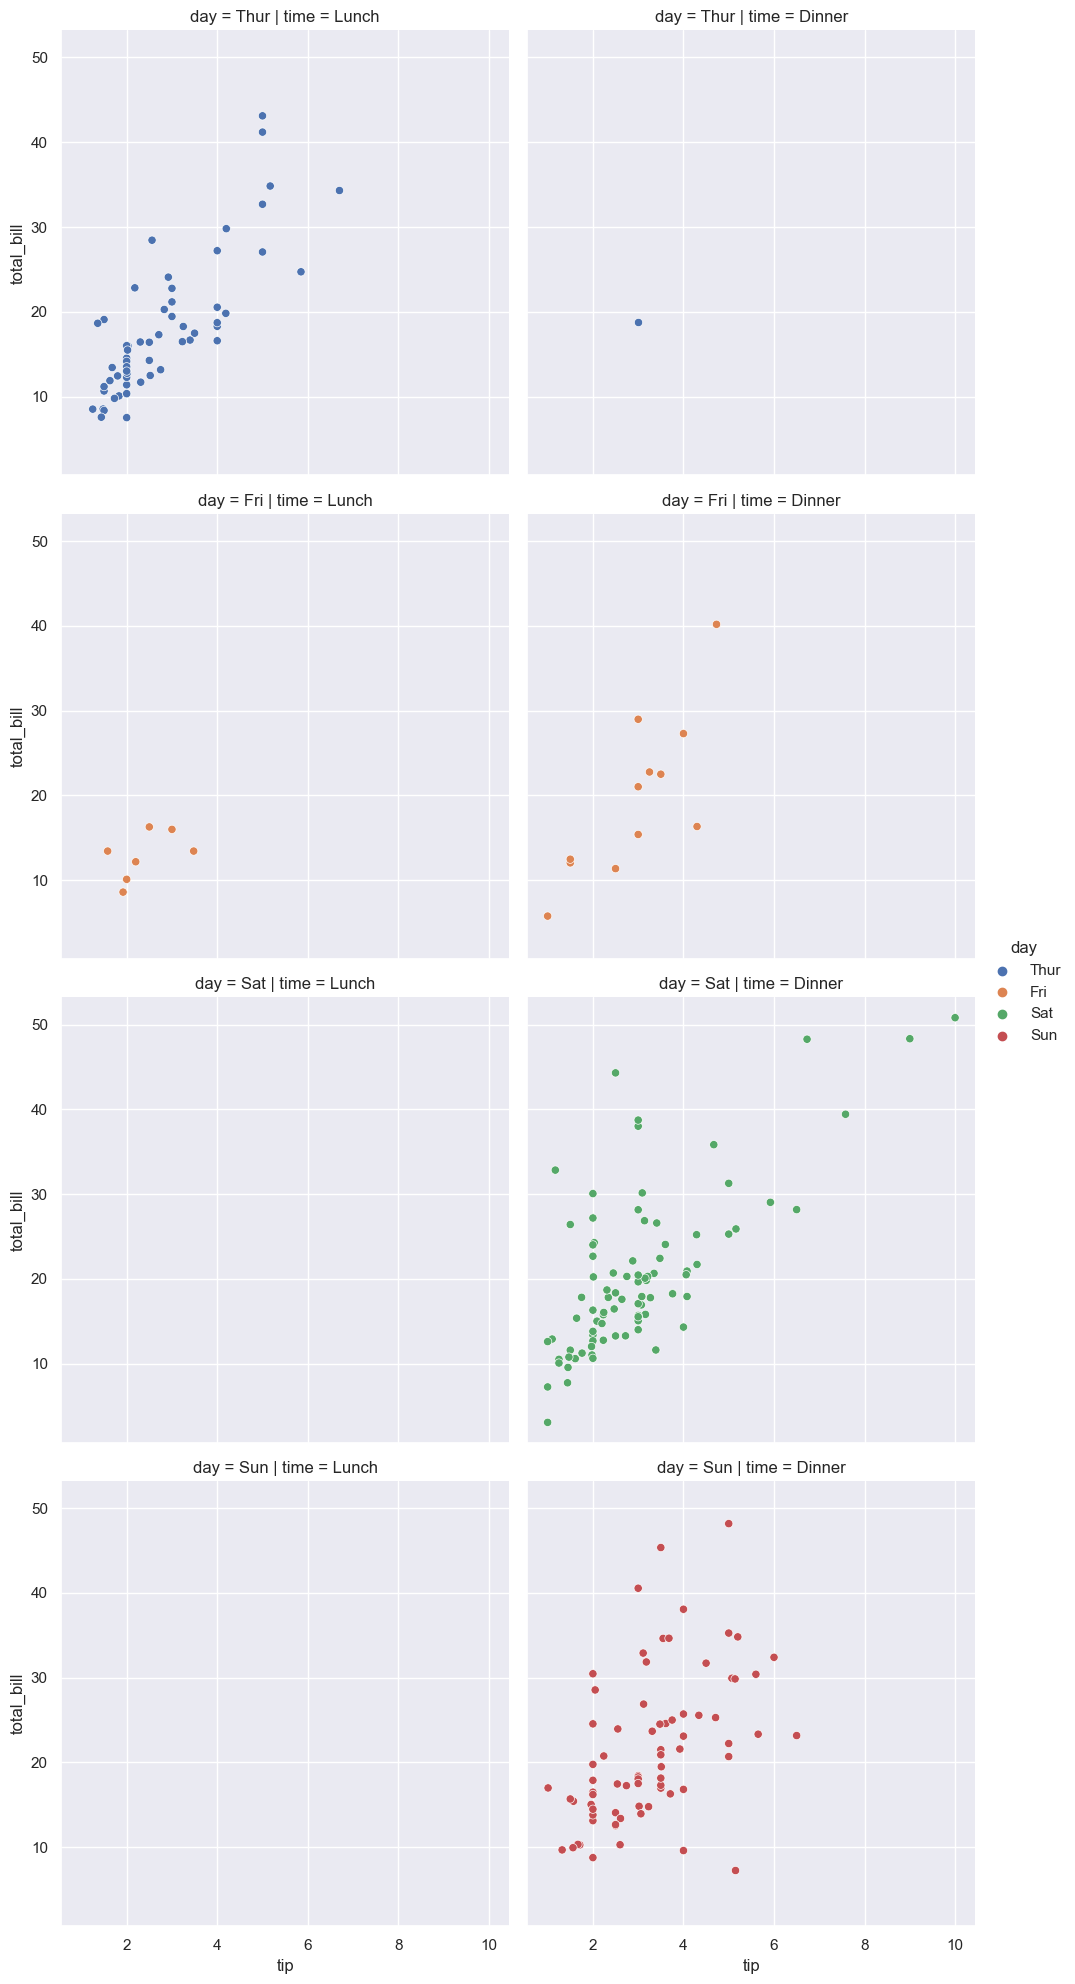

In [66]:
sns.relplot(x='tip', y='total_bill', data=tips, hue='day', col='time', row='day')
plt.show()

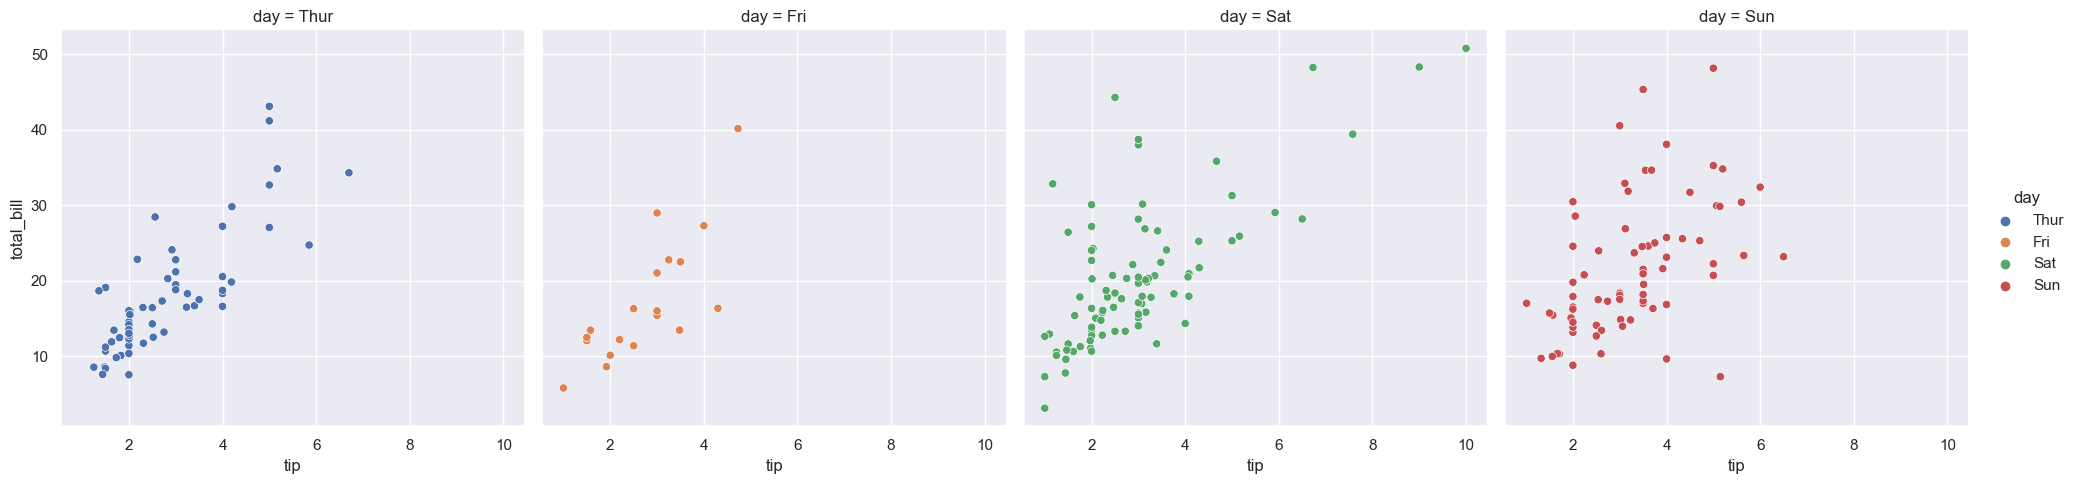

In [67]:
sns.relplot(x='tip', y='total_bill', data=tips, hue='day', col='day')
plt.show()

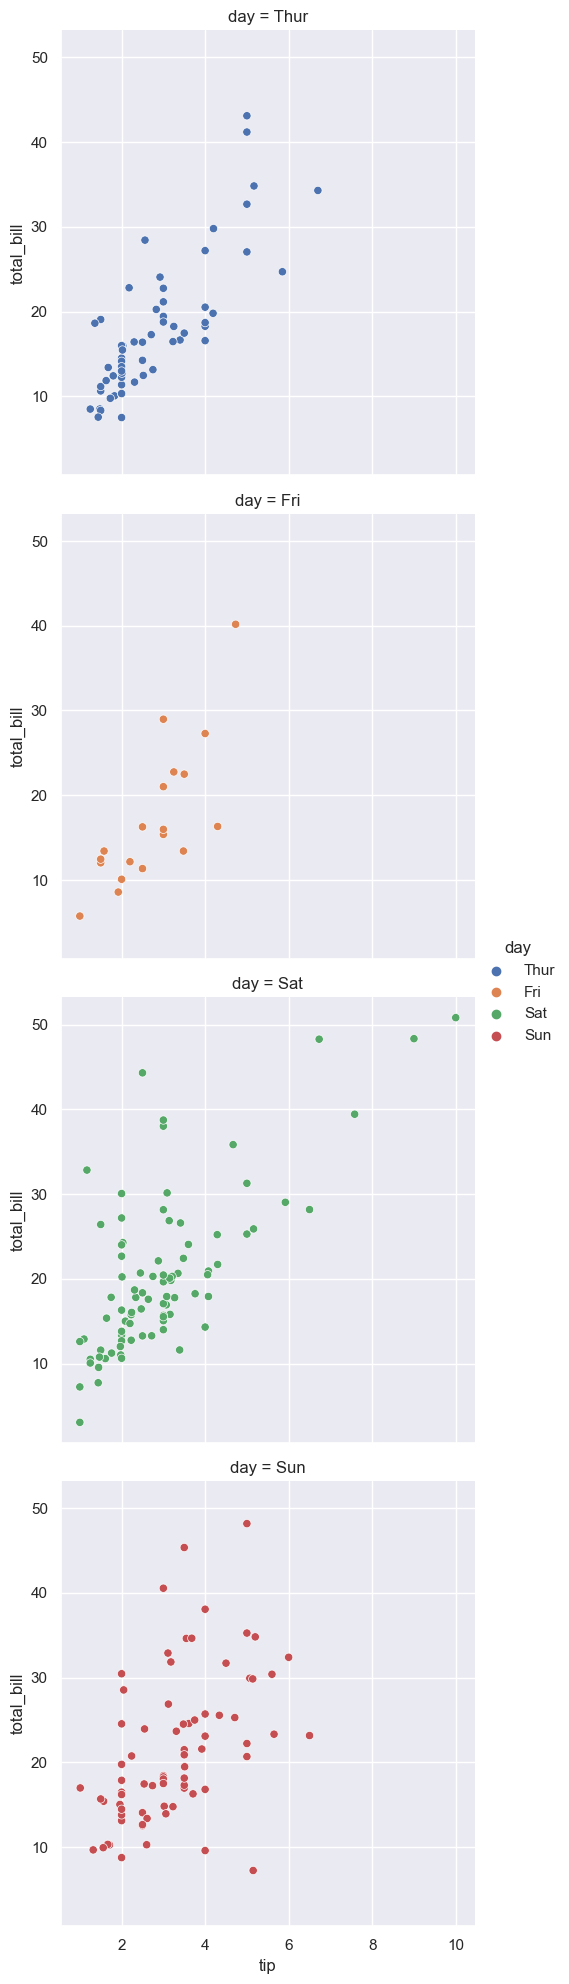

In [82]:
sns.relplot(x='tip', y='total_bill', data=tips, hue='day', row='day')
plt.show()

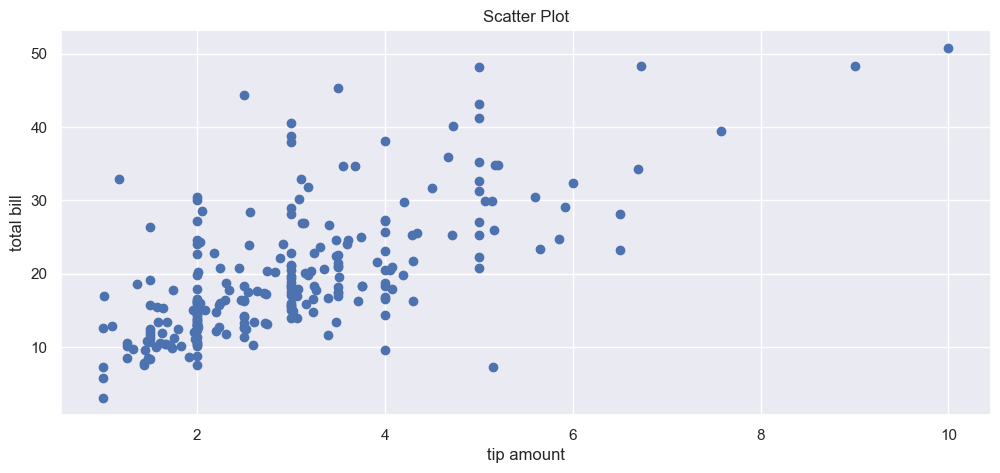

In [68]:
fig = plt.figure(figsize=[12,5])
ax = plt.axes()
t1 = ax.scatter(x='tip', y='total_bill', data=tips)
t2 = ax.set_xlabel("tip amount")
t3 = ax.set_ylabel("total bill")
t4 = ax.set_title("Scatter Plot")

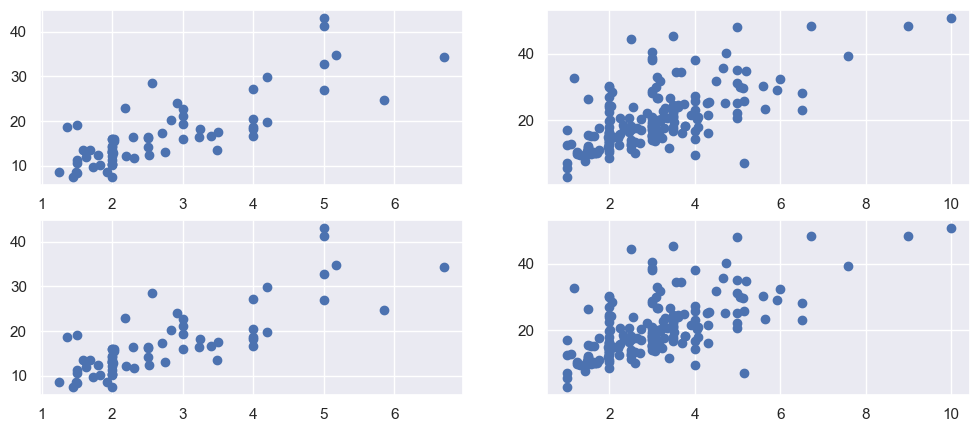

In [70]:
plt.figure(figsize=[12,5])
plt.subplot(2,2,1)
plt.scatter(x='tip', y='total_bill', data=tips[tips.time=="Lunch"])
plt.subplot(2,2,2)
plt.scatter(x='tip', y='total_bill', data=tips[tips.time=="Dinner"])
plt.subplot(2,2,3)
plt.scatter(x='tip', y='total_bill', data=tips[tips.time=="Lunch"])
plt.subplot(2,2,4)
plt.scatter(x='tip', y='total_bill', data=tips[tips.time=="Dinner"])
plt.show()

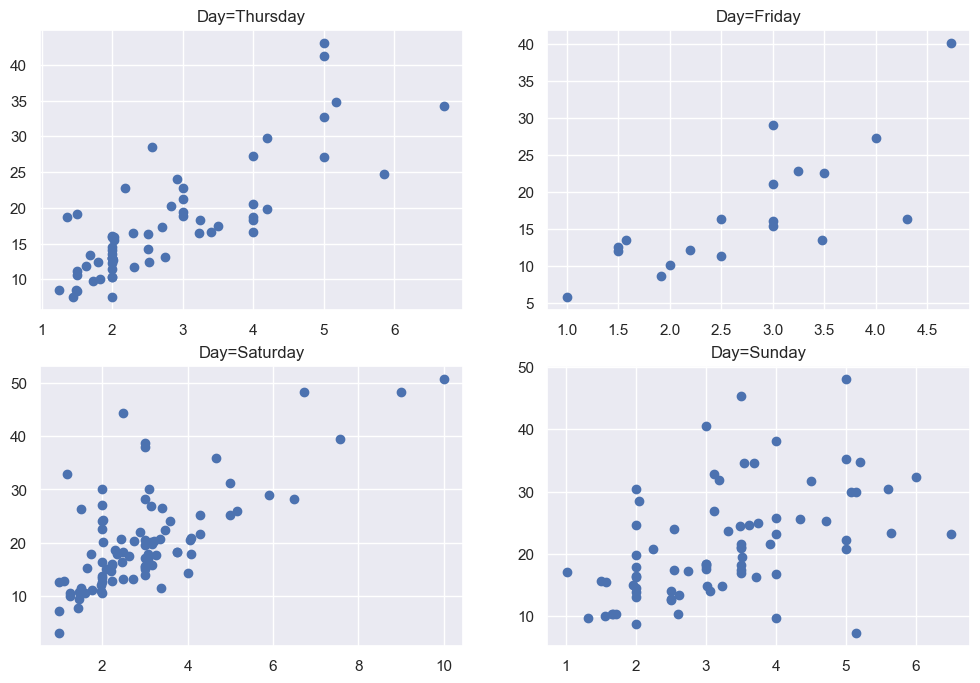

In [74]:
plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
plt.scatter(x='tip', y='total_bill', data=tips[tips.day=="Thur"])
plt.title("Day=Thursday")
plt.subplot(2,2,2)
plt.scatter(x='tip', y='total_bill', data=tips[tips.day=="Fri"])
plt.title("Day=Friday")
plt.subplot(2,2,3)
plt.scatter(x='tip', y='total_bill', data=tips[tips.day=="Sat"])
plt.title("Day=Saturday")
plt.subplot(2,2,4)
plt.scatter(x='tip', y='total_bill', data=tips[tips.day=="Sun"])
plt.title("Day=Sunday")
plt.show()

(<Figure size 1200x500 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

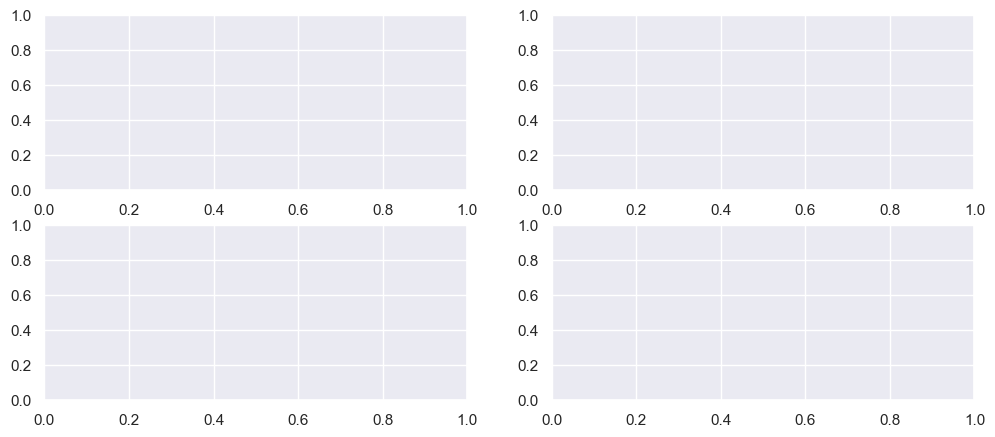

In [77]:
plt.subplots(2,2,figsize=[12,5])

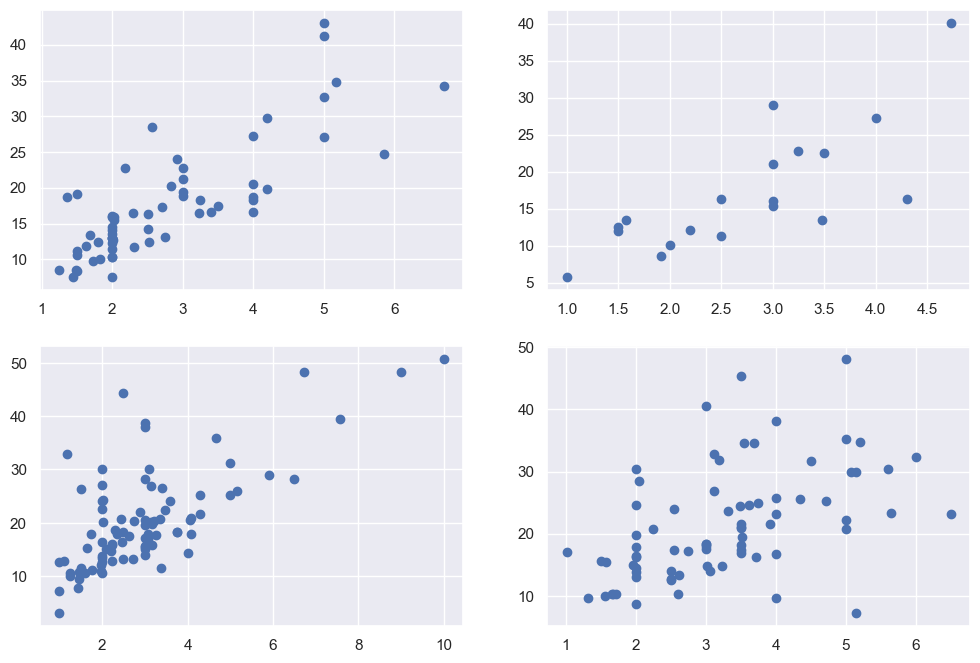

In [79]:
fig, ax = plt.subplots(2,2,figsize=[12,8])
ax[0,0].scatter(x='tip', y='total_bill', data=tips[tips.day=="Thur"])
ax[0,1].scatter(x='tip', y='total_bill', data=tips[tips.day=="Fri"])
ax[1,0].scatter(x='tip', y='total_bill', data=tips[tips.day=="Sat"])
ax[1,1].scatter(x='tip', y='total_bill', data=tips[tips.day=="Sun"])

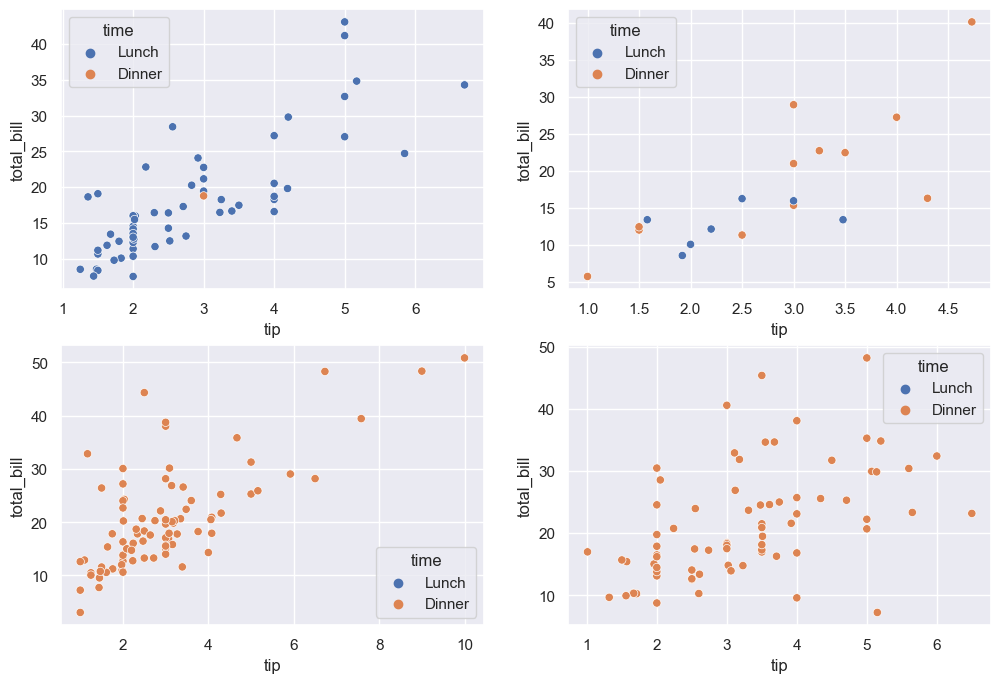

In [81]:
fig, ax = plt.subplots(2,2,figsize=[12,8])
sns.scatterplot(x='tip', y='total_bill', data=tips[tips.day=="Thur"], hue='time', ax=ax[0,0])
sns.scatterplot(x='tip', y='total_bill', data=tips[tips.day=="Fri"], hue='time', ax=ax[0,1])
sns.scatterplot(x='tip', y='total_bill', data=tips[tips.day=="Sat"], hue='time', ax=ax[1,0])
sns.scatterplot(x='tip', y='total_bill', data=tips[tips.day=="Sun"], hue='time', ax=ax[1,1])
plt.show()

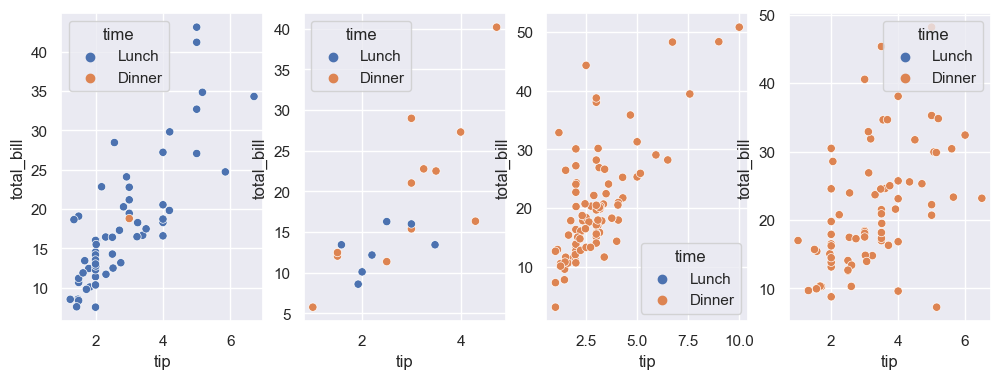

In [84]:
fig, ax = plt.subplots(1,4,figsize=[12,4])
sns.scatterplot(x='tip', y='total_bill', data=tips[tips.day=="Thur"], hue='time', ax=ax[0])
sns.scatterplot(x='tip', y='total_bill', data=tips[tips.day=="Fri"], hue='time', ax=ax[1])
sns.scatterplot(x='tip', y='total_bill', data=tips[tips.day=="Sat"], hue='time', ax=ax[2])
sns.scatterplot(x='tip', y='total_bill', data=tips[tips.day=="Sun"], hue='time', ax=ax[3])
plt.show()

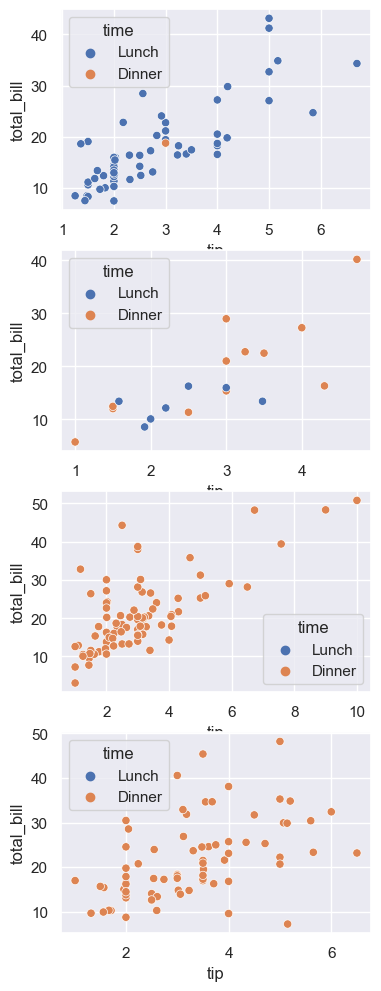

In [85]:
fig, ax = plt.subplots(4,1,figsize=[4,12])
sns.scatterplot(x='tip', y='total_bill', data=tips[tips.day=="Thur"], hue='time', ax=ax[0])
sns.scatterplot(x='tip', y='total_bill', data=tips[tips.day=="Fri"], hue='time', ax=ax[1])
sns.scatterplot(x='tip', y='total_bill', data=tips[tips.day=="Sat"], hue='time', ax=ax[2])
sns.scatterplot(x='tip', y='total_bill', data=tips[tips.day=="Sun"], hue='time', ax=ax[3])
plt.show()